# Práctica 1: La distribución de Gauss

## Informática para la Robótica
### M.U en Lógica, Computación e Inteligencia Artificial
### Universidad de Sevilla

Durante este curso utilizaremos los cuadernos Jupyter para completar las prácticas.
Son bastante fáciles de usar y buenos para mezclar explicaciones y código interactivo.

Un cuaderno Jupyter se compone de celdas que pueden ser de tres tipos:

  - Celdas de código: su contenido se considera código ejecutable que puede producir un resultado que se muestra debajo de la celda.
  - Celdas Markdown: Celdas de texto formateadas mediante el lenguaje Markdown (por ejemplo, ésta). En caso de que no lo hayas utilizado antes, puedes consultar esta [introducción](https://www.markdownguide.org/getting-started) o esta [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).
  - Celdas sin procesar: el contenido de estas celdas no es evaluado por el núcleo del cuaderno.
  
De este modo, los cuadernos proporcionados en este curso tienen una serie de celdas markdown que incluyen teoría, imágenes, ecuaciones, etc., así como celdas de código con partes que deben ser completadas por los alumnos. 

Ejemplo de celda de código. Se puede ejecutar con el botón "Ejecutar", con "Celda->Ejecutar celda" o pulsando "Ctrl+Enter" en la celda.

In [3]:
from scipy.special import perm
#find permutation of 5, 2 using perm (N, k) function
per = perm(5, 2, exact = True)
print("Number of permutations: " + str(per))

Number of permutations: 20


### Notas

1. Si te sientes atascado y necesitas una herramienta de **depuración** más capaz, hay una forma de convertir un notebook en un script python normal.

  - Dentro del editor en File > Download as... > Python 

  Luego puedes depurarlo normalmente usando un editor/IDE como **Visual Studio Code**, **Spyder** o **PyCharm**.
  
2. En el caso de que alguna visualización tenga errores o no se muestre correctamente, existe la posibilidad de que la opción Kernel > Restart pueda arreglarlo.

## Recursos de Python
Los siguientes paquetes van a ser utilizados intensivamente en el curso, por lo que vale la pena introducirlos.

## Numpy y Scipy


Para la creación de arrays y matrices, utilizaremos Numpy [(docs here)](https://docs.scipy.org/doc/numpy/reference/) y algunas funciones de Scipy [(docs here)](https://docs.scipy.org/doc/scipy/reference/).


- **Creación de matrices**: En el código, usaremos siempre arrays numpy (clase `np.ndarray`) creados por:
    - `np.array([...])`: Para la creación normal de arrays
    - `np.vstack([...])` y `np.hstack([...])`: Para la concatenación vertical y horizontal respectivamente.
    - `np.diag([...])`: Para crear una matriz diagonal.
- **Operaciones con matrices**: Existe otra clase llamada `np.matrix` que facilita algunas operaciones: inversa, transposición,... No se usará en nuestro código ya que está marcada para deprecación. En su lugar puedes usar las siguientes funciones:
    - `scipy.linalg.inv()`: Para el **inverso** de una matriz.
    - Si tenemos un ndarray llamado `A` podemos usar `A.T` para la **transposición**. En el caso de que A sea un ndarray plano y queramos un vector vertical podemos utilizar `np.vstack(A)`, ya que `A.T` no nos devolverá la salida esperada.
    - Para la **multiplicación de matrices** el operador `@` está definido en ndarrays como tal. Uso: `A@B`.
- **Generación de valores aleatorios**: utilizaremos en la mayoría de los casos el módulo `numpy.random` . Pero también podemos usar el módulo `scipy.stats` en algunos casos. Hay pocas diferencias entre ambos.

### Matplotlib

Usamos Matplotlib, más explícitamente el módulo `matplotlib.pyplot` [(docs here)](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)
para realizar las diferentes figuras a lo largo de las prácticas. 
En algunos casos te proporcionaremos el código, en otros tendrás que hacerlo tú mismo.

Algunas de las funciones más relevantes son:

- `plt.figure()` o `plt.subplots()` para crear un nuevo gráfico.
- Plt.plot()`: Función de dibujo general. Dependiendo de los parámetros se puede utilizar para dibujar líneas o gráficos de dispersión. 
- Plt.hist()`: Creación de histogramas

# Bases de probabilidad y estadística para la robótica

El campo de la robótica ha encontrado un gran éxito utilizando un enfoque probabilístico para manejar la incertidumbre.
A diferencia de los robots industriales, que residen en entornos controlados, los robots móviles (en los que se centra este curso) tienen que adaptarse a factores adicionales como: entornos dinámicos, ruido en los sensores o sistemas de movimiento poco fiables.

El principio básico de esta **robótica probabilística** es representar esta incertidumbre como una distribución de probabilidad. En la mayoría de los casos utilizaremos las observaciones del entorno (normalmente representadas como $z_n$), para estimar el estado más probable ($x_n$) y el grado de certeza de esta predicción ($\Sigma_{x_n}$).

In [13]:
# IMPORTED LIBS

import numpy as np
from numpy import random
from numpy import linalg
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from utils.PlotEllipse import PlotEllipse


## La distribución de Gauss

La distribución de Gauss (también conocida como distribución Normal) se caracteriza por dos parámetros:

- La **media** ($\mu$) es el valor esperado de la distribución.
- La **desviación estándar** ($\sigma$) representa como de dispersados están los posibles valores.

La función de distribución de probabilidad (**pdf**) de una distribución de Gauss viene definida por:

$$
    N(x | \mu, \sigma^2) = 
        \frac{1}{\sqrt{2\pi\sigma^2}}
        e^{-\frac{1}{2\sigma^2}\left(x - \mu \right)^2}
$$

**Ejercicio**

Completa el siguiente código para representar la pdf de una distribución de Gauss con $\mu = 2$ y $\sigma = 1$.

Evalúa la función en el intervalo $x \in [-5, 5]$, generando 100 muestras entre esos valores. <i>Pista: usa la función np.linspace. La constante *np.pi* también puede ser útil.</i>

In [3]:
def evaluate_gaussian(mu=2, sigma=1, min_interval=-5, max_interval=5, n_samples=100,dibujo = False, valores = True):
    """Evaluates a gaussian distribution between in a certain interval and plots it
    
    Args:        
        mu: mean of the distribution
        sigma: standard deviation of the distribution
        min_interval: minimum value of the interval
        max_interval: maximum value of the interval
        n_samples: number of samples
    """
    
    plt.figure()
    x = np.linspace(min_interval,max_interval,n_samples)         # Create the array of values where the gaussian distribution is going to be evaluated 
    variance = sigma**2  # Get the variance from the given standar deviation 
    cte =1/(np.sqrt(2*np.pi*variance))
    tipificada = [(-(x-mu)**2)/(2*variance) for x in x]
    res =   cte*np.exp((tipificada))    # Implement the gaussian distribution computation 
    if dibujo:
        plt.plot(x,res)  # Show the results
    if valores:
        return x,res

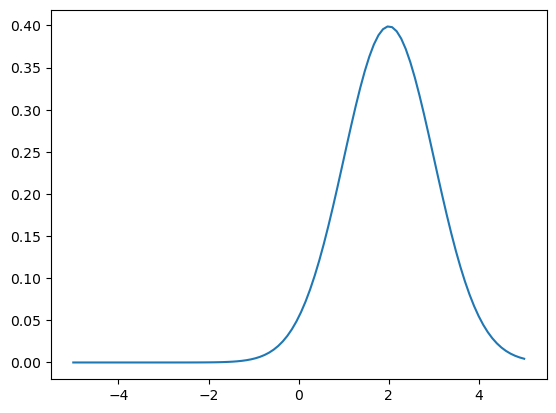

In [4]:
mu = 2
sigma = 1
min_interval=-5
max_interval=5
n_samples=100
(evaluate_gaussian(valores=False,dibujo=True))

### Muestreo a partir de una distribución

El muestreo a partir de una distribución aleatoria consiste en generar un conjunto de valores de acuerdo a la distribución aleatoria.

Esto es de especial interés para los *filtros de partículas*.

**Ejercicio**

Utiliza la función `randn()` del módulo `random` de numpy. 

Este módulo contiene funciones para hacer muestreo de distribuciones aleatorias. Puedes encontrar documentación adicional aquí: [Enlace](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

Muestrea una distribución gaussiana con $\mu = 2$ y $\sigma = 2$. A continuación, representa los valores resultantes a lo largo del eje x. 

![Ejemplo de un posible resultado](images/fig2-1-3.png)


In [5]:
def gen_samples(n, mu, sigma):
    """Generate n samples of a gaussian distribution
    
    Args:
        n: Number of samples
        mu: mean of the distribution
        sigma: standard deviation of the distribution

    Returns:
        array of samples
    """
    samples =  np.random.normal(mu, sigma, n) # Generate samples
    return samples

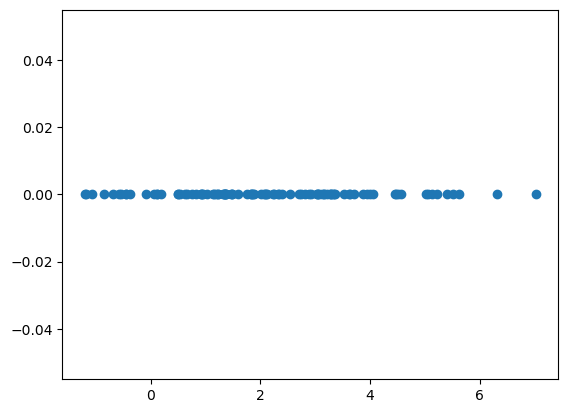

In [6]:
num = 100
plt.scatter(gen_samples(num,2,2), np.zeros(num))

Una vez completado el código anterior, podrás responder a las siguientes preguntas:

- ¿En torno a qué valor se concentran las muestras? ¿Por qué?

<span style="color:green">***Escribe tu respuesta aquí***</span>

Los valores se concentrar en torno al valor 2, puesto que esta es la media de mi muestra

De hecho, si seguimos muestreando la distribución y construimos un histograma de las muestras obtenidas, el histograma resultante será similar a su respectiva gaussiana dado un número suficientemente grande de muestras. 

**Ejercicio**

1. Para comprobarlo, te pedimos que crees un vector de muestras grande, es decir, de tamaño 1000.

2. A continuación, complete la función `hist_slice`, que toma una matriz de muestras y un número entero `n`. Esta función dibuja los primeros valores `n` del array como un **histograma**.

3. Para mostrar los resultados del ejercicio utilizaremos los widgets de Jupyter. Puedes encontrar más información sobre ellos aquí [[link]](https://ipywidgets.readthedocs.io/en/latest/index.html), pero de momento utiliza la llamada comentada a `interact`.

Juega con diferentes parámetros de la función `hist()` de matplotlib. Docs aquí: [[Enlace]](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

Las barras del histograma deben ser normalizadas por el área total. (CONSEJO: Establezca los parámetros opcionales `density` y `stacked` de `hist()` a True)

![](images/fig2-1-4.png)


In [7]:
def hist_slice(samples, n):
    """Plot histogram for the first n values in samples"""
    x,y = evaluate_gaussian(2, 2, min(samples)-2, max(samples)+2, 100)
    plt.hist(samples[:n],  edgecolor="black", density=True, stacked=True)    
    plt.plot(x,y, 'r')
    plt.xlabel("Samples for N = %d" % n)

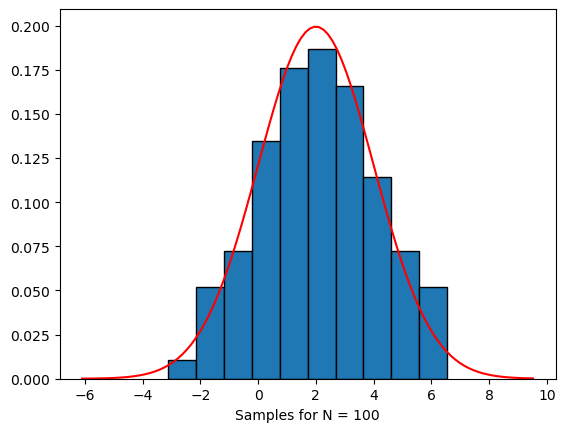

In [8]:
random.seed(0)
samples = gen_samples(1000, 2, 2)
n = 100
hist_slice(samples, n)

In [9]:
interact(hist_slice, samples=fixed(samples), n=(100, 1000, 100))

interactive(children=(IntSlider(value=500, description='n', max=1000, min=100, step=100), Output()), _dom_clas…

<function __main__.hist_slice(samples, n)>

##  Propiedades de la distribución gaussiana

Una vez que hemos adquirido cierta familiaridad con la distribución gaussiana, podemos repasar algunas de sus principales propiedades, que son la razón principal del amplio uso de esta distribución en robótica.

### Teorema del límite central

**La suma de N variables aleatorias independientes e idénticamente distribuidas (i.i.d.), es decir, que pertenecen a la misma distribución y son independientes entre sí, se vuelve cada vez más gaussiana cuanto mayor es N.** 

Esta propiedad es válida independientemente de la distribución de probabilidad que se haya utilizado para crear las muestras. Es uno de los conceptos clave en probabilidad, ya que permite la generalización de muchos problemas.

Puedes ver un vídeo de demostración de esto ejecutando la celda de abajo:

In [10]:
%%HTML
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/dlbkaurTAUg?autoplay=0&mute=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

**Ejercicio**

Te pedimos que crees una demostración similar al ejemplo anterior.

- Complete la siguiente función `plot_sum`. Esta función devuelve un vector de longitud `v_length`, que resulta de la suma de `N` vectores generados aleatoriamente utilizando una distribución uniforme $[0, 1)$. Cada vector aleatorio debe tener la misma longitud (por ejemplo `v_length=100`).
- Dentro de la función, traza el histograma correspondiente.
- Por último, comprueba que la figura resultante tiene la forma de una gaussiana. 

In [11]:
def plot_sum(v_length, N):
    
    #create the vector for storing the sums
    sum_samples = np.zeros(v_length)
    
    # Generate N vectors of samples and sum them within sum_samples
    for _ in range(0, N):
        sum_samples += random.rand(v_length)
    x,y = evaluate_gaussian(mu=N/2, sigma=1, min_interval=-5+N/2, max_interval=5+N/2, n_samples=100)
    # Plot the resultant histogram
    plt.hist(sum_samples,
             bins=25, density=True,
             stacked=True, edgecolor='black') 
    
    plt.plot(x,y, 'r')

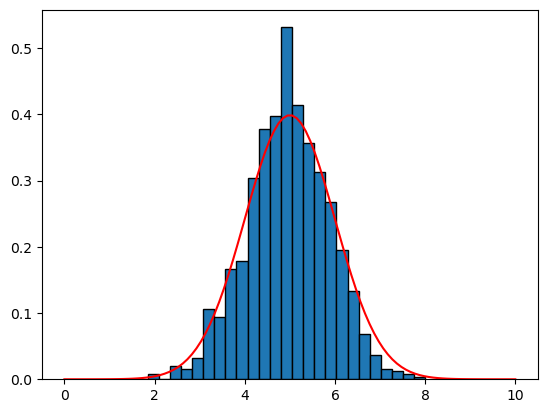

In [12]:
v_length = 1000
N = 10
plot_sum(v_length, N)

Ahora juega un poco con el número de vectores generados aleatoriamente

In [13]:
interact(plot_sum, v_length=fixed(v_length), N=(0, 25, 1))

interactive(children=(IntSlider(value=12, description='N', max=25), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_sum(v_length, N)>

### Producto de gaussianas

La suma ponderada de dos gaussianas resulta en una variable aleatoria que representa el producto de ambas. Este producto está definido como:

$$
     N\left(
        \frac{\sigma_2^2\mu_1+\sigma_1^2\mu_2}
        {\sigma_1^2+\sigma_2^2},
         \frac{\sigma_1^2 \sigma_ 2^2}
         {\sigma_1^2 + \sigma_ 2^2}
     \right)
$$

**Ejercicio.**

Completa la siguiente función para calcular el producto de dos distribuciones gaussianas.

Dibuja el resultado y comprueba que se corresponde con la fórmula anterior jugando con diferentes distribuciones.


![](images/fig2-2-3.png)

In [14]:
def gaussians_product(mu1,mu2,sig1,sig2,x):
    
    var1, var2 = sig1**2, sig2**2 # Get the variances from the standar deviations

    X = np.arange(-12, 12, 1/x)
    pdf1 = stats.norm(loc=mu1, scale=var1).pdf(X)
    pdf2 = stats.norm(loc=mu2, scale=var2).pdf(X)

    plt.plot(X, pdf1, label='N({},{})'.format(mu1, sig1))
    plt.plot(X, pdf2, label='N({},{})'.format(mu2, sig2))
    
    # Get the parameters defining the gaussian distribution resulting from their product
    mu3 = (var2*mu1+var1*mu2)/(var1+var2)
    sig3 = (var1*var2)/(var1+var2)
    c = stats.norm(loc=mu3, scale=sig3).pdf(X)

    plt.plot(X, c, label='Avg. = N({},{})'.format(mu3, sig3))
    plt.legend()


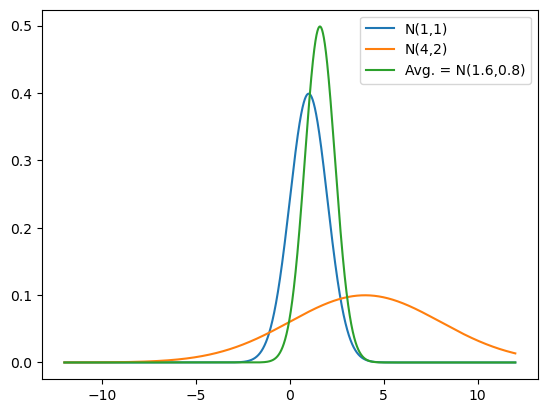

In [15]:
mu1, sig1 = 1, 1
mu2, sig2 = 4, 2
x = 1000    

gaussians_product(mu1,mu2,sig1,sig2,x)

### Transformación lineal de variables aleatorias gaussianas.

**Propiedad.** Las distribuciones gaussianas son cerradas bajo transformaciones lineales, es decir, cuando aplicamos una suma o producto a variables aleatorias normales, el resultado es también una variable aleatoria normal.

Esta es también una propiedad destacable, por ejemplo en el campo de la robótica podemos *operar normalmente sobre distribuciones aleatorias* siempre que sólo utilicemos funciones lineales.
En caso contrario, si nos vemos en la necesidad de aplicar una *transformación no lineal* (por ejemplo seno, coseno, ...), la distribución de probabilidad resultante *no se corresponderá con ninguna pdf gaussiana*, causando complicaciones adicionales en el proceso.

**Asignación.**

- Generar un número `n_muestras` de muestras aleatorias a partir de la dist. $N(1,1)$.
- Luego transfórmala siguiendo la expresión $y = a*x + b$ y dibuja el resultado para $a=b=2$.
- Por último, dibuja encima el pdf de $N(4,4)$ y comprueba que ambos son iguales.

![](images/fig2-2-4.png)

In [21]:


def linear_transformation(n_samples, a, b):
    """Apply lineal transform. Generating n_samples samples from N(1,1)"""
    
    # Generates n_samples from N(1,1)
    mu = 1
    stdv = 1
    samples = stats.norm(loc=mu, scale=stdv).rvs(n_samples)
    
    samples_2 = a*samples+b # Apply the linear transformation to the samples

    # Plot histogram (blue bars)
    n, bins, patches = plt.hist(samples_2, bins=90, density=True, stacked=True)

    delta = 1/samples.size 
    X = np.arange(bins[0], bins[-1], delta)
    A = stats.norm(loc=mu, scale=stdv).pdf(X) # Evaluate N(1,1) in X
    B = stats.norm(loc=a*mu+b, scale=a).pdf(X) # Evaluate the resultant distribution in X
    
    # Show results
    plt.plot(X, A, color='green', label='N({},{})'.format(mu, stdv))
    plt.plot(X, B, color='red', label='N({},{})'.format(a*mu+b , stdv*(a**2))) 
    plt.legend()

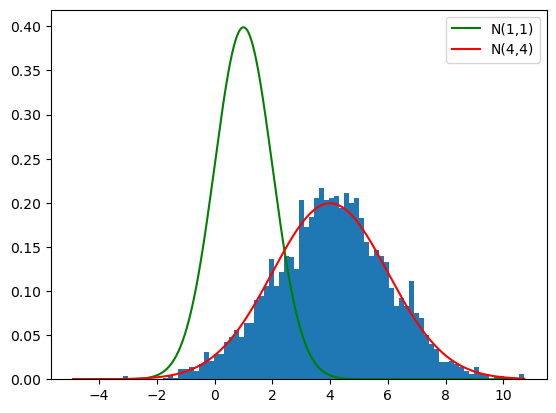

In [22]:
n_samples = 3000
a = 2
b = 2
linear_transformation(n_samples, a, b)

Ahora juega un poco con diferentes valores de $a$ y $b$

In [23]:
interact(linear_transformation, n_samples=fixed(n_samples), b=(-5, 5, 1), a=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=0, description='b', …

<function __main__.linear_transformation(n_samples, a, b)>

## Distribución normal bidimensional

Las aplicaciones más útiles de las distribuciones gaussianas no se limitan a distribuciones o variables individuales, sino a un conjunto de distribuciones aleatorias que pueden depender unas de otras. Algunos ejemplos de estas *distribuciones multidimensionales* que utilizaremos en los siguientes ejercicios son: la posición y orientación de un robot $(x, y, \theta)$ (a.k.a. pose), una observación de una serie de sensores de alcance $([z_0, z_1, \dots, z_n])$, entre otros. 

Algunas características clave:

- La *media* $(\mu)$ ahora contiene un vector de $n$ valores $([\mu_1, \mu_2, \dots, \mu_n]')$. Su dimensionalidad/forma es $(n \times 1)$, es decir, es un vector vertical.
- La *covarianza* (ahora denominada $\Sigma$) es una matriz completa de forma $(n \times n)$. El caso es que ahora necesitamos expresar las relaciones (es decir, la dependencia) de cada variable con el resto.

### Suma de variables aleatorias bidimensionales

En este ejercicio, veremos cómo se comportan las gaussianas cuando sumamos 2 variables aleatorias multidimensionales.

Dada la suma de 2 gaussianas multidimensionales $(X_1, X_2)$, la variable aleatoria resultante $(X_3)$ también sigue una distribución gaussiana definida como:

$$
    \left.
    \begin{aligned}
    X_1 &\sim N(\mu_1, \Sigma_1) \\
    X_2 &\sim N(\mu_2, \Sigma_2) \\
    X_3 &= X_1 + X_2
    \end{aligned}
    \enspace\right\}\enspace 
    X_3 \sim N(\mu_1 + \mu_2, \Sigma_1 + \Sigma_2)
$$


**Ejercicio**

1. Generar y extraer `n_muestras` aleatorias de 2 distribuciones bidimensionales diferentes. $N_1=N(\mu_1,\Sigma_1)$ y $N_2=N(\mu_2,\Sigma_2)$. La *media* $(\mu_n)$ es un vector de dimensión $(2 \times 1)$ y la *covarianza* $(\sigma_n)$ una matriz $(2 \times 2)$. Representan la media y la covarianza de cada distribución respectivamente. Utiliza la función `multivariate_normal` del módulo **scipy.stats**.
2. Dibuja las dos elipses asociadas a cada distribución. Utiliza `PlotEllipse()` de la librería utils.
3. Suma ambas muestras y dibuja la elipse $x_3 \sim N(\mu_1+\mu_2, \Sigma_1+\Sigma_2)$.

ADVERTENCIA: Al pasar la media a la función `PlotEllipse()`, ésta toma un vector $(2 \times 1)$, mientras que `multivariate_normal()` toma una matriz plana $(1 \times 2).$

**Ejemplo**

```python
    n_samples = 500
    
    mean1 = np.vstack([1, 0])
    sigma1 = np.array([[3, 2], [2, 3]])
    mean2 = np.vstack([2, 3])
    sigma2 = np.array([[2, 0], [0, 1]]) 
```

<figure style="text-align:center">
  <img src="images/fig2-3-1.png" alt="">
  <figcaption>Fig. 1: Distribution of the sum of two RVs (in blue and red)</figcaption>
</figure>


In [24]:
def sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples):
    
    fig, ax = plt.subplots()

    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean=np.hstack(mean1), cov=sigma1)# Hint: you have to use .flatten()
    pdf2 = stats.multivariate_normal(mean =np.hstack(mean2), cov=sigma2)

    # Generate n_samples from them
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)

    # Draw samples as crosses
    x1 = [x[0] for x in rvs1]
    x2 = [x[0] for x  in rvs2]
    y1 = [x[1] for x in rvs1]
    y2 = [x[1] for x in rvs2]
    plt.scatter(x1,y1, marker='+', label="N1")
    plt.scatter(x2,y2, marker='+', color='red', label="N2")

    # Draw ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='blue')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='red')

    # Compute and draw N1 + N2
    rvs3 = rvs1+rvs2
    plt.scatter(rvs3[:,0],rvs3[:,1], marker='+',color='magenta', label="N1+N2")
    PlotEllipse(fig, ax, mean1+mean2, sigma1+sigma2, mult, color='magenta')
    plt.legend()

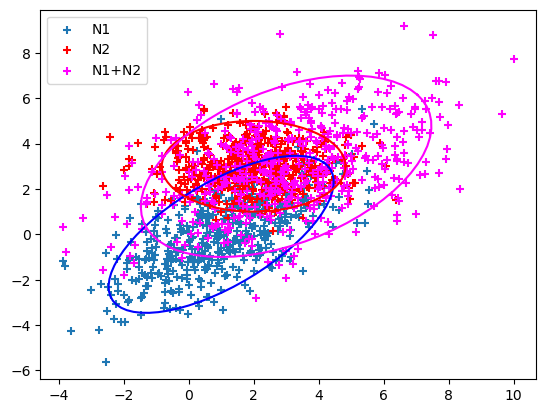

In [25]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

sum_of_rvs(mean1,sigma1,mean2,sigma2,n_samples)

### Producto de pdfs gaussianas

El producto de dos distribuciones gaussianas (*pdfs*) es también una distribución gaussiana.
Esta distribución corresponde a la media ponderada de las muestras de esas mismas *pdfs*.

Dadas dos distribuciones gaussianas $N_1 \sim N(\mu_1, \Sigma_1)$ y $N_2 \sim N(\mu_2, \Sigma_2)$, la gaussiana resultante $N_3$ se define como:

$$
\begin{equation}
    \bar{X} =
        \left(
            \Sigma_1^{-1} + \Sigma_2^{-1}
        \right)^{-1}
        \left(
            \Sigma_2^{-1} X_1 + \Sigma_1^{-1} X_2
        \right)\\
     N_3 =
         \left(
             \bar{X},
             (\Sigma_1^{-1} +\Sigma_2^{-1} )^{-1}
         \right)
\end{equation}
$$

**Ejercicio**

Dadas las dos muestras del ejercicio anterior, dibuja la elipse (gaussiana correspondiente) que representa su media ponderada.

**Ejemplo**

<figure style="text-align:center">
  <img src="images/fig2-3-2.png" alt="Trulli">
  <figcaption>Fig. 2: Product of two pdfs (in blue and green)</figcaption>
</figure> 


In [21]:
def bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples):

    fig, ax = plt.subplots()
    
    # Build the normal distributions
    pdf1 = stats.multivariate_normal(mean = np.hstack(mean1), cov = sigma1)
    pdf2 = stats.multivariate_normal(mean = np.hstack(mean2), cov = sigma2)

    # Generate n_samples 
    rvs1 = pdf1.rvs(n_samples)
    rvs2 = pdf2.rvs(n_samples)
    
    # Draw the samples
    x1 = [x[0] for x in rvs1]
    x2 = [x[0] for x  in rvs2]
    y1 = [x[1] for x in rvs1]
    y2 = [x[1] for x in rvs2]
    plt.scatter(x1, y1, marker='+', color='green')
    plt.scatter(x2, y2, marker='+', color='blue')
   
    # Calculate average of distributions
    invs1 = np.linalg.inv(sigma1) # Hint use linalg.inv
    invs2 = np.linalg.inv(sigma2)

    sigma3 = np.linalg.inv(invs1+invs2)
    mean3 = sigma3 @(invs2@mean1 + invs1@mean2) # Hint: use the @ operator

    # Plot the ellipses
    mult = 2
    PlotEllipse(fig, ax, mean1, sigma1, mult, color='green',label ='N1(mu1,sigma1)')
    PlotEllipse(fig, ax, mean2, sigma2, mult, color='blue',label = 'N2(mu2,sigma2)')
    PlotEllipse(fig, ax, mean3, sigma3, mult*1.5, color='magenta', label = 'N2(mu3,sigma3)') 
    plt.legend()

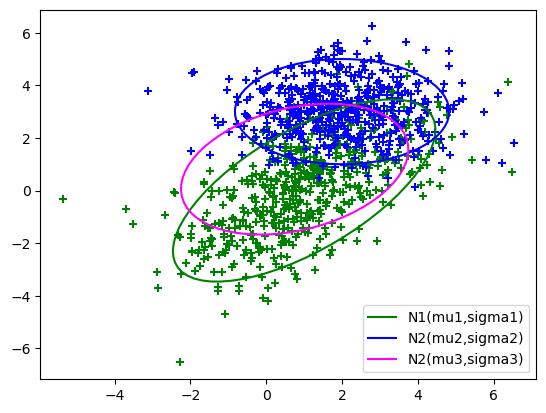

In [22]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])

bidimensional_gaussians_product(mean1,sigma1,mean2,sigma2,n_samples)

### Transformación lineal de variables aleatorias normales

Como mencionamos antes, cuando transformamos linealmente una variable aleatoria gaussiana, 
el resultado sigue siendo una gaussiana. Esta es una propiedad muy deseable de tener, 
ya que nos permite operar normalmente, siempre y cuando las funciones sean lineales.

**Asignación**

Utilizando las muestras anteriores $x_1$, 
comprueba que la transformación $x_5 = A*x_1 +b$ da como resultado una dist normal. 
$N(A \mu_1+b, A \Sigma_1 A^T)$. Dadas las matrices `A` y `b` en el siguiente código.

**Ejemplo**

Ejemplo del resultado a escala=2.5 y los valores dados a continuación:

<figure style="text-align:center">
  <img src="images/fig2-3-3.png" alt="">
  <figcaption>Fig. 3: Transformación lineal de los VR. Muestras originales (en azul) y resultados (en magenta)</figcaption>.
</figura>

In [74]:
def bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples): #linear_transform_demo ponia eso
    
    fig, ax = plt.subplots()
    
    # Define the linear transformation
    A = np.array([[-1, 2], [2, 1.5]])
    b = np.vstack([3, 0])

    # Build distribution
    pdf1 = stats.multivariate_normal(mean = np.hstack(mean1), cov = sigma1)

    # Draw samples from it
    rvs1 = pdf1.rvs(n_samples)
    

    # Show the samples
    x1 = [x[0] for x in rvs1]
    y1 = [x[1] for x in rvs1]
    ax.set_xlim((-16, 20))
    ax.set_ylim((-11, 16))
    ax.scatter(x1, y1, marker='+', label="x1")

    # Apply linear transformation transformacion lineal
    x5 = A@rvs1.T+b # Hint: use the @ operator

    # Show the new samples and its ellipse
    x2 = [x5[i] for i in range(0,len(x5),2)]
    y2 = [x5[i] for i in range(1,len(x5),2)]
    ax.scatter(x2, y2, marker='.', color='magenta', label='A*x1+b')
    PlotEllipse(fig, ax, A@mean1+b, A@sigma1@np.transpose(A), 2.5, color='magenta')
    ax.legend()

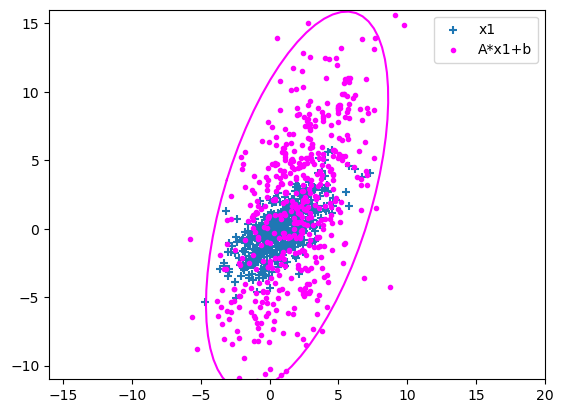

In [75]:
n_samples = 500
mean1 = np.vstack([1, 0])
sigma1 = np.array([[3, 2], [2, 3]])
mean2 = np.vstack([2, 3])
sigma2 = np.array([[2, 0], [0, 1]])
    
bidimensional_linear_transform(mean1,sigma1,mean2,sigma2,n_samples)

## Conclusiones
En la celda de abajo, comenta lo que se ha hecho en el cuaderno, 
lo que te ha parecido interesante o cualquier otra reflexión relevante.

<span style="color:green">***Escribe tu respuesta aquí***</span>

En esta práctica hemos estudiado la distribución normal y algunas de sus propiedades, tanto para dimensión uno como en dimensiones superiores. Aunque a nivel teórico se podría seguir este cuaderno para la comprensión de la distribución de Gauss es de mucha ayuda las gráficas para una mejor comprensión visual.